In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
people_df = pd.read_csv('src/data/baseballdatabank-master/core/People.csv')
batting_df = pd.read_csv('src/data/baseballdatabank-master/core/Batting.csv')
fielding_df = pd.read_csv('src/data/baseballdatabank-master/core/Fielding.csv')

In [ ]:
batting_df2 = dc.initial_drop(batting_df)
batting_df3 = dc.combine_stints(batting_df2)
bat_with_pos = dc.map_position(batting_df3, fielding_df)
bat_with_pos['AVG'] = bat_with_pos['H'] / bat_with_pos['AB']
trimmed_df = dc.trim_batters(bat_with_pos)

In [69]:
condensed_df = dc.condense_df(trimmed_df)

In [70]:
condensed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2349
Columns: 119 entries, playerID to pos_SS
dtypes: float64(70), int64(42), object(1), uint8(6)
memory usage: 2.1+ MB


In [71]:
X = condensed_df.drop('playerID', axis=1)

In [103]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)

In [104]:
kmeans.cluster_centers_

array([[18.45783133,  2.79518072,  0.26556764, ...,  0.06024096,
         0.46987952,  0.09638554],
       [ 7.18781726,  1.65482234,  0.24677526, ...,  0.63451777,
         0.14213198,  0.06598985],
       [ 9.58415842,  1.82178218,  0.25481281, ...,  0.03960396,
         0.48514851,  0.04950495],
       ...,
       [25.78461538,  5.56923077,  0.28941173, ...,  0.03076923,
         0.47692308,  0.04615385],
       [ 8.52348993,  2.10067114,  0.25718896, ...,  0.20805369,
         0.33557047,  0.14765101],
       [13.22560976,  2.79878049,  0.25090345, ...,  0.24390244,
         0.31707317,  0.15853659]])

In [105]:
kmeans.labels_

array([17, 19, 14, ...,  7,  7,  2], dtype=int32)

In [106]:
condensed_df['label'] = kmeans.labels_

In [107]:
condensed_df

,playerID,year1_2B,year1_3B,year1_AVG,year1_BB,year1_CS,year1_G,year1_GIDP,year1_HBP,year1_HR,...,year7_SF,year7_SH,year7_SO,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,pos_SS,label
0,aaronha01,27,6,0.279915,28,2.0,122,13.0,3.0,13,...,12.0,0.0,63.0,0,0,0,0,1,0,17
1,abbotku01,17,3,0.249275,16,0.0,101,5.0,5.0,9,...,1.0,0.0,51.0,0,0,0,0,0,1,19
2,abreubo01,10,2,0.250000,21,2.0,59,0.0,1.0,3,...,7.0,0.0,126.0,0,0,0,0,1,0,14
3,adairje01,21,1,0.264249,35,2.0,133,6.0,2.0,9,...,3.0,6.0,52.0,0,1,0,0,0,0,3
4,adamsbo03,13,3,0.244373,18,0.0,94,7.0,3.0,4,...,0.0,8.0,67.0,0,0,1,0,0,0,13
5,adamssp01,12,0,0.289389,26,19.0,95,0.0,1.0,4,...,0.0,5.0,5.0,0,0,0,0,0,1,5
6,adcocjo01,16,1,0.293011,24,0.0,102,12.0,0.0,8,...,2.0,11.0,86.0,1,0,0,0,0,0,3
7,ageeto01,27,8,0.273450,41,18.0,160,17.0,10.0,22,...,3.0,1.0,92.0,0,0,0,0,1,0,7
8,ainsmed01,1,2,0.192308,6,0.0,33,0.0,0.0,0,...,0.0,16.0,48.0,0,0,0,1,0,0,1
9,aldremi01,18,3,0.250000,33,3.0,84,3.0,2.0,2,...,0.0,3.0,45.0,0,0,0,0,1,0,19


In [108]:
condensed_df[condensed_df['label'] == 5]

,playerID,year1_2B,year1_3B,year1_AVG,year1_BB,year1_CS,year1_G,year1_GIDP,year1_HBP,year1_HR,...,year7_SF,year7_SH,year7_SO,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,pos_SS,label
5,adamssp01,12,0,0.289389,26,19.0,95,0.0,1.0,4,...,0.0,5.0,5.0,0,0,0,0,0,1,5
35,anderjo01,11,14,0.288416,12,0.0,103,0.0,5.0,10,...,0.0,3.0,0.0,0,0,0,0,1,0,5
37,andreed01,21,2,0.221429,9,0.0,109,0.0,0.0,0,...,0.0,0.0,32.0,0,0,0,0,1,0,5
54,austiji01,11,5,0.231121,32,0.0,136,0.0,1.0,1,...,0.0,35.0,60.0,0,0,1,0,0,0,5
83,barnhcl01,15,13,0.258352,32,3.0,124,0.0,3.0,3,...,0.0,21.0,19.0,0,0,0,0,1,0,5
87,barryja01,4,3,0.222222,10,0.0,40,0.0,3.0,0,...,0.0,31.0,34.0,0,0,0,0,0,1,5
96,batesjo02,21,5,0.251984,36,0.0,140,0.0,10.0,6,...,0.0,11.0,16.0,0,0,0,0,1,0,5
107,beaumgi01,15,8,0.352403,41,0.0,111,0.0,7.0,3,...,0.0,14.0,0.0,0,0,0,0,1,0,5
109,beckegl01,21,3,0.239414,28,8.0,154,14.0,3.0,3,...,4.0,12.0,24.0,0,1,0,0,0,0,5
155,bierblo01,17,5,0.226054,21,0.0,137,0.0,0.0,2,...,0.0,0.0,29.0,0,1,0,0,0,0,5


In [95]:
avg_cols = [col for col in condensed_df.columns if 'AVG' in col]
avg_cols.append('playerID')
avg_cols

['year1_AVG',
 'year2_AVG',
 'year3_AVG',
 'year4_AVG',
 'year5_AVG',
 'year6_AVG',
 'year7_AVG',
 'playerID']

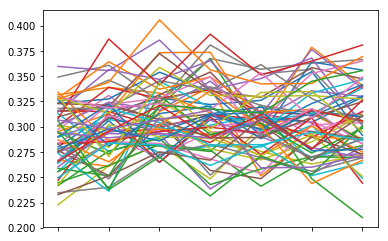

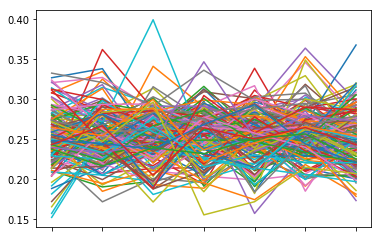

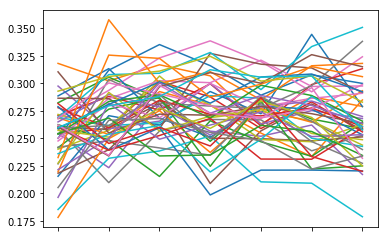

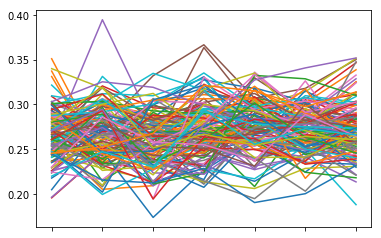

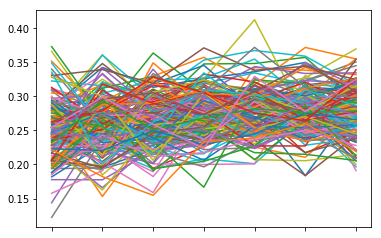

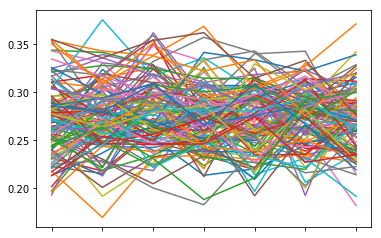

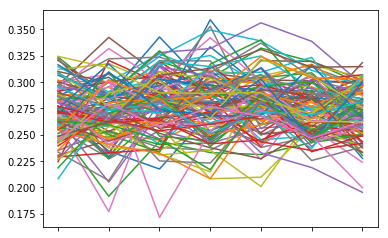

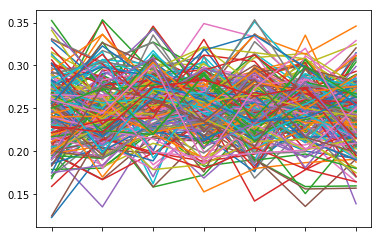

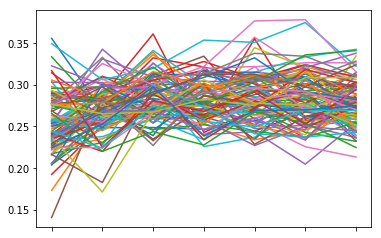

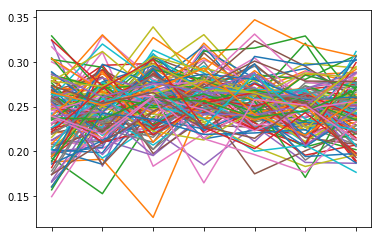

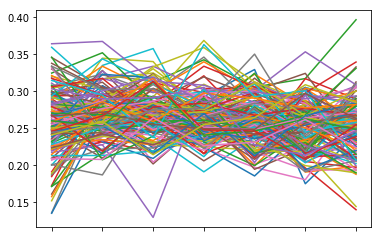

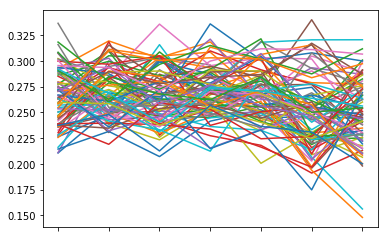

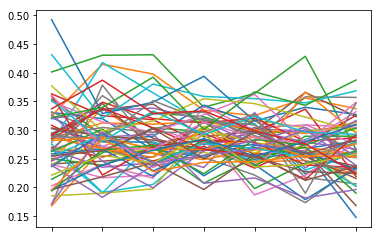

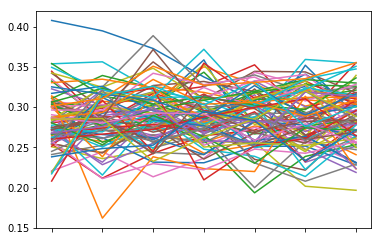

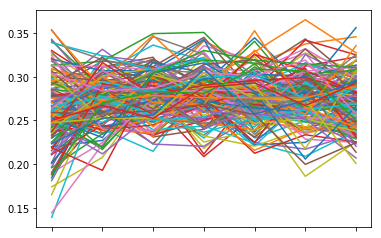

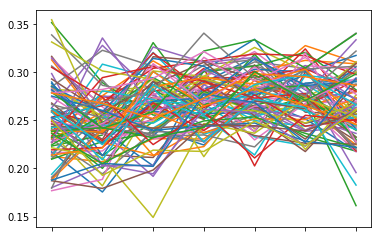

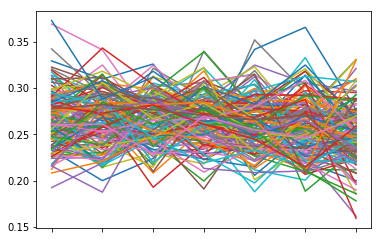

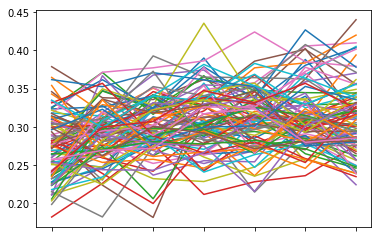

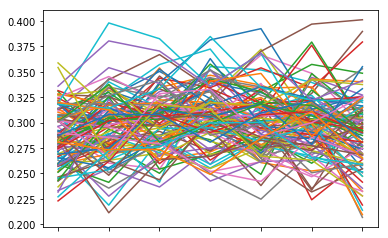

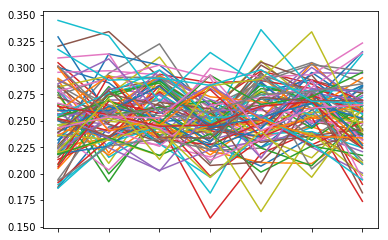

In [129]:
for label in condensed_df['label'].unique():
    avgs_df = condensed_df.loc[condensed_df['label'] == label, avg_cols].set_index('playerID')
    avgs_df.T.plot()
    plt.gca().get_legend().remove()
plt.show()

In [323]:
test_df = condensed_df.loc[condensed_df['label'] == 0, avg_cols].set_index('playerID', drop=True)

In [278]:
def get_metrics(X_test, y_true, y_pred, model):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    score = model.score(X_test, y_true)
    print('MSE:\t{:0.3f}\n'\
          'RMSE:\t{:0.3f}\n'\
          'Score:\t{:0.3f}'.format(mse, rmse, score))

# DecisionTreeRegressor
---

In [339]:
X_tree = condensed_df.drop('label', axis=1).set_index('playerID')

In [340]:
y_tree = X_tree.pop('year7_AVG')

In [341]:
# regr_tree_2_base = DecisionTreeRegressor(max_depth=2).fit(X_tree, y_tree)
regr_tree_4_base = DecisionTreeRegressor(max_depth=4).fit(X_tree, y_tree)
# regr_tree_6_base = DecisionTreeRegressor(max_depth=6).fit(X_tree, y_tree)
# regr_tree_8_base = DecisionTreeRegressor(max_depth=8).fit(X_tree, y_tree)

In [342]:
# feat_import_tree_2 = regr_tree_2_base.feature_importances_
feat_import_tree_4 = regr_tree_4_base.feature_importances_
# feat_import_tree_6 = regr_tree_6_base.feature_importances_
# feat_import_tree_8 = regr_tree_8_base.feature_importances_

In [343]:
# import_feats_tree_2 = np.where(feat_import_tree_2 > 0)[0]
import_feats_tree_4 = np.where(feat_import_tree_4 > 0)[0]
# import_feats_tree_6 = np.where(feat_import_tree_6 > 0)[0]
# import_feats_tree_8 = np.where(feat_import_tree_8 > 0)[0]

In [344]:
# X_tree_2 = X_tree.iloc[:, import_feats_tree_2]
X_tree_4 = X_tree.iloc[:, import_feats_tree_4]
# X_tree_6 = X_tree.iloc[:, import_feats_tree_6]
# X_tree_8 = X_tree.iloc[:, import_feats_tree_8]

In [345]:
# X_train_tree_2, X_test_tree_2, y_train_tree_2, y_test_tree_2 = train_test_split(X_tree_2, y_tree, test_size=0.2)
X_train_tree_4, X_test_tree_4, y_train_tree_4, y_test_tree_4 = train_test_split(X_tree_4, y_tree, test_size=0.2)
# X_train_tree_6, X_test_tree_6, y_train_tree_6, y_test_tree_6 = train_test_split(X_tree_6, y_tree, test_size=0.2)
# X_train_tree_8, X_test_tree_8, y_train_tree_8, y_test_tree_8 = train_test_split(X_tree_8, y_tree, test_size=0.2)

In [346]:
# regr_tree_2 = DecisionTreeRegressor(max_depth=2).fit(X_train_tree_2, y_train_tree_2)
regr_tree_4 = DecisionTreeRegressor(max_depth=4).fit(X_train_tree_4, y_train_tree_4)
# regr_tree_6 = DecisionTreeRegressor(max_depth=6).fit(X_train_tree_6, y_train_tree_6)
# regr_tree_8 = DecisionTreeRegressor(max_depth=8).fit(X_train_tree_8, y_train_tree_8)

In [347]:
# y_pred_tree_2 = regr_tree_2.predict(X_test_tree_2)
y_pred_tree_4 = regr_tree_4.predict(X_test_tree_4)
# y_pred_tree_6 = regr_tree_6.predict(X_test_tree_6)
# y_pred_tree_8 = regr_tree_8.predict(X_test_tree_8)

In [348]:
# print('max_depth=2')
# get_metrics(X_test_tree_2, y_test_tree_2, y_pred_tree_2, regr_tree_2)
print('max_depth=4')
get_metrics(X_test_tree_4, y_test_tree_4, y_pred_tree_4, regr_tree_4)
# print('max_depth=6')
# get_metrics(X_test_tree_6, y_test_tree_6, y_pred_tree_6, regr_tree_6)
# print('max_depth=8')
# get_metrics(X_test_tree_8, y_test_tree_8, y_pred_tree_8, regr_tree_8)

max_depth=2
MSE:	0.001
RMSE:	0.030
Score:	0.369
max_depth=4
MSE:	0.001
RMSE:	0.028
Score:	0.449
max_depth=6
MSE:	0.001
RMSE:	0.030
Score:	0.365
max_depth=8
MSE:	0.001
RMSE:	0.033
Score:	0.293


# RandomForestRegressor
---

In [297]:
X_rf = condensed_df.drop('label', axis=1).set_index('playerID')
y_rf = X_rf.pop('year7_AVG')

In [310]:
# regr_forest_2_base = RandomForestRegressor(max_depth=2).fit(X_rf, y_rf)
regr_forest_4_base = RandomForestRegressor(max_depth=4).fit(X_rf, y_rf)
# regr_forest_6_base = RandomForestRegressor(max_depth=6).fit(X_rf, y_rf)
# regr_forest_8_base = RandomForestRegressor(max_depth=8).fit(X_rf, y_rf)

In [311]:
# feat_import_rf_2 = regr_forest_2_base.feature_importances_
feat_import_rf_4 = regr_forest_4_base.feature_importances_
# feat_import_rf_6 = regr_forest_6_base.feature_importances_
# feat_import_rf_8 = regr_forest_8_base.feature_importances_

In [307]:
# import_feats_rf_2 = np.where(feat_import_rf_2 > 0)[0]
import_feats_rf_4 = np.where(feat_import_rf_4 > 0)[0]
# import_feats_rf_6 = np.where(feat_import_rf_6 > 0)[0]
# import_feats_rf_8 = np.where(feat_import_rf_8 > 0)[0]

In [308]:
# X_rf_2 = X_rf.iloc[:, import_feats_rf_2]
# X_rf_4 = X_rf.iloc[:, import_feats_rf_4]
X_rf_6 = X_rf.iloc[:, import_feats_rf_6]
# X_rf_8 = X_rf.iloc[:, import_feats_rf_8]

In [309]:
# X_train_rf_2, X_test_rf_2, y_train_rf_2, y_test_rf_2 = train_test_split(X_rf_2, y_rf, test_size=0.2)
X_train_rf_4, X_test_rf_4, y_train_rf_4, y_test_rf_4 = train_test_split(X_rf_4, y_rf, test_size=0.2)
# X_train_rf_6, X_test_rf_6, y_train_rf_6, y_test_rf_6 = train_test_split(X_rf_6, y_rf, test_size=0.2)
# X_train_rf_8, X_test_rf_8, y_train_rf_8, y_test_rf_8 = train_test_split(X_rf_8, y_rf, test_size=0.2)

In [313]:
# regr_forest_2 = RandomForestRegressor(max_depth=2).fit(X_train_rf_2, y_train_rf_2)
regr_forest_4 = RandomForestRegressor(max_depth=4).fit(X_train_rf_4, y_train_rf_4)
# regr_forest_6 = RandomForestRegressor(max_depth=6).fit(X_train_rf_6, y_train_rf_6)
# regr_forest_8 = RandomForestRegressor(max_depth=8).fit(X_train_rf_8, y_train_rf_8)

In [314]:
# y_pred_rf_2 = regr_forest_2.predict(X_test_rf_2)
y_pred_rf_4 = regr_forest_4.predict(X_test_rf_4)
# y_pred_rf_6 = regr_forest_6.predict(X_test_rf_6)
# y_pred_rf_8 = regr_forest_8.predict(X_test_rf_8)

In [315]:
# print('max_depth=2')
# get_metrics(X_test_rf_2, y_test_rf_2, y_pred_rf_2, regr_forest_2)
print('max_depth=4')
get_metrics(X_test_rf_4, y_test_rf_4, y_pred_rf_4, regr_forest_4)
# print('max_depth=6')
# get_metrics(X_test_rf_6, y_test_rf_6, y_pred_rf_6, regr_forest_6)
# print('max_depth=8')
# get_metrics(X_test_rf_8, y_test_rf_8, y_pred_rf_8, regr_forest_8)

max_depth=2
MSE:	0.001
RMSE:	0.031
Score:	0.348
max_depth=4
MSE:	0.001
RMSE:	0.027
Score:	0.514
max_depth=6
MSE:	0.001
RMSE:	0.027
Score:	0.507
max_depth=8
MSE:	0.001
RMSE:	0.027
Score:	0.504


In [6]:
test_df = pd.read_csv('src/data/condensed.csv').set_index('playerID')
test_df

,year1_2B,year1_3B,year1_BB,year1_CS,year1_G,year1_GIDP,year1_HBP,year1_HR,year1_IBB,year1_R,...,year7_SF,year7_SH,year7_SO,year7_avg,pos_1B,pos_2B,pos_3B,pos_C,pos_OF,pos_SS
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,27,6,28,2.0,122,13.0,3.0,13,0.0,58,...,12.0,0.0,63.0,0.291525,0,0,0,0,1,0
abbotku01,17,3,16,0.0,101,5.0,5.0,9,1.0,41,...,1.0,0.0,51.0,0.216561,0,0,0,0,0,1
abreubo01,10,2,21,2.0,59,0.0,1.0,3,0.0,22,...,7.0,0.0,126.0,0.299827,0,0,0,0,1,0
adairje01,21,1,35,2.0,133,6.0,2.0,9,4.0,41,...,3.0,6.0,52.0,0.270531,0,1,0,0,0,0
adamsbo03,13,3,18,0.0,94,7.0,3.0,4,0.0,35,...,0.0,8.0,67.0,0.282575,0,0,1,0,0,0
adamssp01,12,0,26,19.0,95,0.0,1.0,4,0.0,40,...,0.0,5.0,5.0,0.260204,0,0,0,0,0,1
adcocjo01,16,1,24,0.0,102,12.0,0.0,8,0.0,46,...,2.0,11.0,86.0,0.290749,1,0,0,0,0,0
ageeto01,27,8,41,18.0,160,17.0,10.0,22,3.0,98,...,3.0,1.0,92.0,0.227488,0,0,0,0,1,0
ainsmed01,1,2,6,0.0,33,0.0,0.0,0,0.0,4,...,0.0,16.0,48.0,0.191429,0,0,0,1,0,0
